In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
batch_size = 32
img_height = 32
img_width = 32
data_dir = "./myData"
labels_path="./labels.csv"

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 73139 files belonging to 43 classes.
Using 58512 files for training.
Found 73139 files belonging to 43 classes.
Using 14627 files for validation.


In [4]:
num_classes = len(train_ds.class_names)

In [5]:
ID2Label = pd.read_csv(labels_path)
classLabels=[]
for i in train_ds.class_names:
    classLabels.append(ID2Label['Name'][int(i)])

In [6]:
model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(layers.Conv2D(8, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0

In [7]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1829/1829 [==============================] - 60s 32ms/step - loss: 2.2851 - accuracy: 0.3964 - val_loss: 0.4535 - val_accuracy: 0.8689
Epoch 2/10
1829/1829 [==============================] - 38s 21ms/step - loss: 0.3919 - accuracy: 0.8889 - val_loss: 0.2582 - val_accuracy: 0.9213
Epoch 3/10
1829/1829 [==============================] - 38s 21ms/step - loss: 0.2042 - accuracy: 0.9420 - val_loss: 0.1562 - val_accuracy: 0.9557
Epoch 4/10
1829/1829 [==============================] - 39s 21ms/step - loss: 0.1328 - accuracy: 0.9606 - val_loss: 0.1220 - val_accuracy: 0.9650
Epoch 5/10
1829/1829 [==============================] - 39s 21ms/step - loss: 0.0988 - accuracy: 0.9709 - val_loss: 0.1131 - val_accuracy: 0.9676
Epoch 6/10
1829/1829 [==============================] - 39s 21ms/step - loss: 0.0794 - accuracy: 0.9763 - val_loss: 0.1041 - val_accuracy: 0.9711
Epoch 7/10
1829/1829 [==============================] - 39s 21ms/step - loss: 0.0653 - accuracy: 0.9804 - val_loss: 0.0907 -

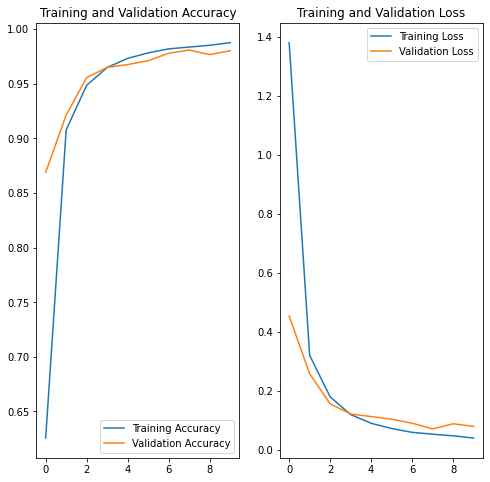

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
testLabel=[]
predLabel=[]
for images, labels in val_ds:
    predictions = model.predict(images)
    for i in range(len(predictions)):
        scores = tf.nn.softmax(predictions[i])
        idx = np.argmax(scores)
        acc = np.max(scores) * 100
        testLabel.append(classLabels[labels[i]])
        predLabel.append(classLabels[idx])

<AxesSubplot:>

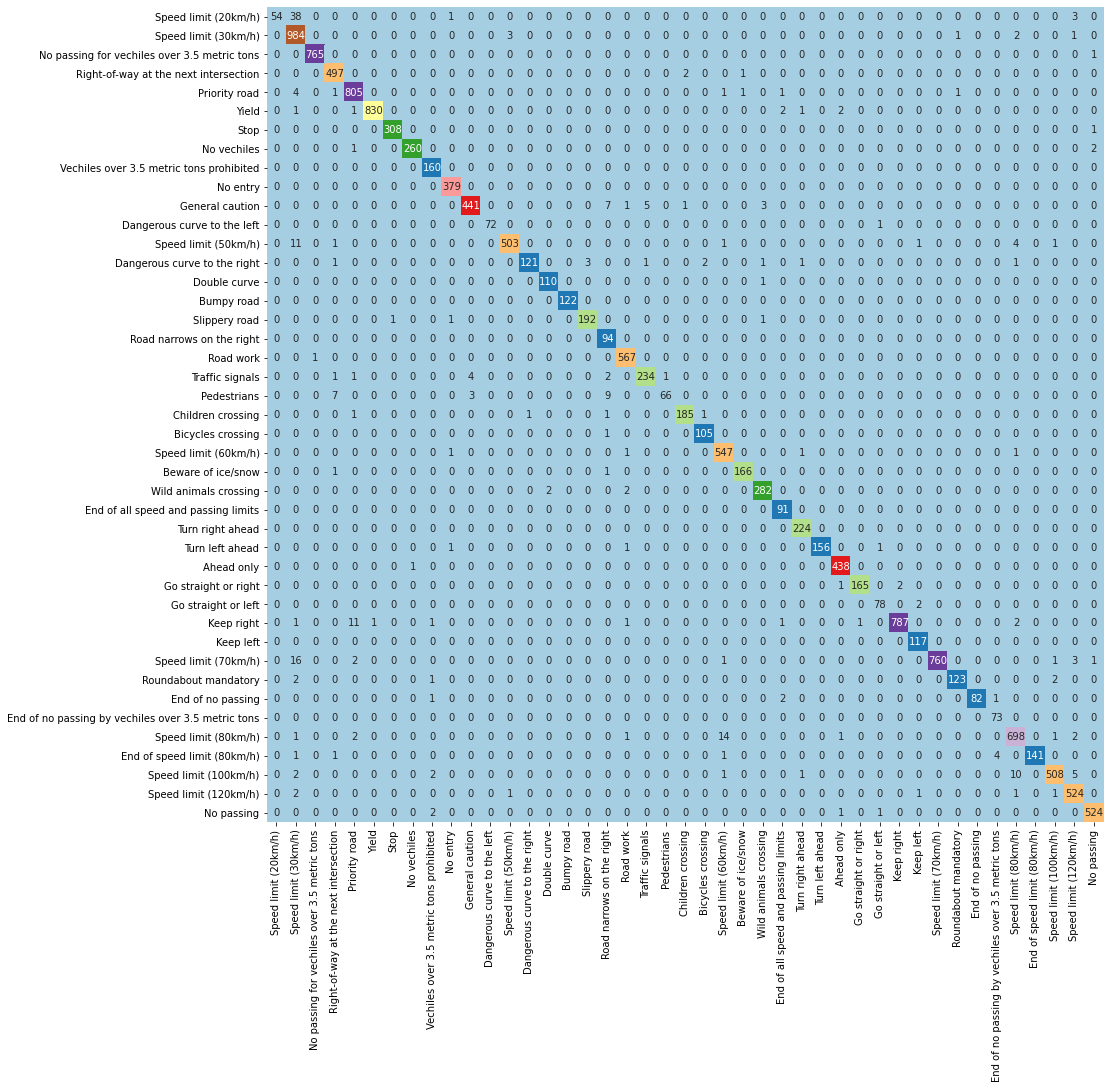

In [10]:
confusion = confusion_matrix(testLabel, predLabel, classLabels)
plt.figure(figsize=(15,15))
sns.heatmap(confusion, annot = True, cbar = False, cmap='Paired', fmt="d", xticklabels=classLabels, yticklabels=classLabels)

In [11]:
print(classification_report(testLabel, predLabel, classLabels, target_names=classLabels))

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       1.00      0.56      0.72        96
                              Speed limit (30km/h)       0.93      0.99      0.96       991
      No passing for vechiles over 3.5 metric tons       1.00      1.00      1.00       766
             Right-of-way at the next intersection       0.97      0.99      0.98       500
                                     Priority road       0.98      0.99      0.98       814
                                             Yield       1.00      0.99      1.00       837
                                              Stop       1.00      1.00      1.00       309
                                       No vechiles       1.00      0.99      0.99       263
          Vechiles over 3.5 metric tons prohibited       0.96      1.00      0.98       160
                                          No entry       0.99      1.00      0.